<div style="text-align: center; background-color: #0A6EBD; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
    FIT-HCMUS, VNU-HCM 
    <br>
    LẬP TRÌNH KHOA HỌC DỮ LIỆU 
    <br>
    Final project 📌
</div>

<div style="text-align: center; background-color: #5A96E3; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Stage 01 - Preprocessing📌
</div>


# 1. Import relevant modules and libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Read and clean data

In [2]:
raw_data = pd.read_csv('../data/loan_approval_dataset.csv')
raw_data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [3]:
print(f"This dataset has {raw_data.shape[0]} rows and {raw_data.shape[1]} columns")

This dataset has 4269 rows and 13 columns


**Each row is a person who applied to loan money** 

## Columns meaning

<table style="font-family: Arial, sans-serif; font-size: 16px;">
  <tr>
    <th><b>Attribute</b></th>
    <th><b>Description</b></th>
  </tr>
  <tr>
    <td><b>loan_id</b></td>
    <td>The unique identification number of each sample.</td>
  </tr>
  <tr>
    <td><b>no_of_dependents</b></td>
    <td>The number of dependents of the applicant.</td>
  </tr>
  <tr>
    <td><b>education</b></td>
    <td>The edducation level of the applicant, either <b>Graduate</b> or <b>Not Graduate</b>.</td>
  </tr>
  <tr>
      <td><b>self_employed</b></td>
      <td>Either if the applicant is self employed or not.</td>
    </tr>
  <tr>
      <td><b>income_annum</b></td>
      <td>The annual income of the applicant.</td>
    </tr>
  <tr>
      <td><b>loan_amount</b></td>
      <td>The total amount requested for the loan.</td>
    </tr>
  <tr>
      <td><b>loan_term</b></td>
      <td>The duration, in years, within which the loan must be repaid.</td>
    </tr>
  <tr>
      <td><b>cibil_score</b></td>
      <td>Credit score of the applicant.</td>
    </tr>
  <tr>
      <td><b>residential_assets_value</b></td>
      <td>The total value of the applicant's residential assets.</td>
    </tr>
  <tr>
      <td><b>commercial_assets_value</b></td>
      <td>The total value of the applicant's commercial assets.</td>
    </tr>
 <tr>
      <td><b>luxury_assets_value</b></td>
      <td>The total value of the applicant's luxury assets.</td>
    </tr>
 <tr>
      <td><b>bank_asset_value</b></td>
      <td>The total value of the applicant's bank assets.</td>
    </tr>
 <tr>
      <td><b>loan_status</b></td>
      <td>Target variable. Describes whether the loan was approved or not.</td>
    </tr>
</table>

## Handle duplicated rows

In [4]:
index = raw_data.index
detect_dup_series = index.duplicated(keep='first')
num_duplicated_rows = detect_dup_series.sum()
if num_duplicated_rows == 0:
    print(f"Raw data have no duplicated rows!")
else:
    if num_duplicated_rows > 1:
        ext = "lines"
    else:
        ext = "line"
    print(f"Raw data have {num_duplicated_rows} duplicated " + ext + ". Please de-deduplicate the data!")

Raw data have no duplicated rows!


## Inspect and handle columns name

In [5]:
raw_data.columns.values

array(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype=object)

Many columns' name have a space before their name. We can fix this by mapping with new names which do not contain spaces

In [6]:
new_cols_name = ['loan_id', 'no_of_dependents', 'education', 'self_employed',
                 'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
                 'residential_assets_value', 'commercial_assets_value',
                 'luxury_assets_value', 'bank_asset_value', 'loan_status']

column_name_mapping = dict(zip(raw_data.columns, new_cols_name))
raw_data.rename(columns=column_name_mapping, inplace=True)

raw_data.columns.values

array(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype=object)

## Removing meaningless columns

In [9]:
raw_data = raw_data.drop(['loan_id'],axis= 1)

## Checking columns data types and missing values

In [10]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   no_of_dependents          4269 non-null   int64 
 1   education                 4269 non-null   object
 2   self_employed             4269 non-null   object
 3   income_annum              4269 non-null   int64 
 4   loan_amount               4269 non-null   int64 
 5   loan_term                 4269 non-null   int64 
 6   cibil_score               4269 non-null   int64 
 7   residential_assets_value  4269 non-null   int64 
 8   commercial_assets_value   4269 non-null   int64 
 9   luxury_assets_value       4269 non-null   int64 
 10  bank_asset_value          4269 non-null   int64 
 11  loan_status               4269 non-null   object
dtypes: int64(9), object(3)
memory usage: 400.3+ KB


**Every columns' datatype is correct. Some columns seem to be float instead of int, however, there is no need to change as pthon normal computation still considers result as float object** 

### Numeric data inspection

In [33]:
num_data = raw_data.select_dtypes(exclude='object')
def missing_ratio(df):
    return (df.isna().mean()).round(3)

def median(df):
    return (df.quantile(0.5)).round(3)

def lower_quartile(df):
    return (df.quantile(0.25)).round(3)

def upper_quartile(df):
    return (df.quantile(0.75)).round(3)

num_data_info = num_data.agg([missing_ratio, "min", lower_quartile, median, upper_quartile, "max"])
num_data_info

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
missing_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,200000.0,300000.0,2.0,300.0,-100000.0,0.0,300000.0,0.0
lower_quartile,1.0,2700000.0,7700000.0,6.0,453.0,2200000.0,1300000.0,7500000.0,2300000.0
median,3.0,5100000.0,14500000.0,10.0,600.0,5600000.0,3700000.0,14600000.0,4600000.0
upper_quartile,4.0,7500000.0,21500000.0,16.0,748.0,11300000.0,7600000.0,21700000.0,7100000.0
max,5.0,9900000.0,39500000.0,20.0,900.0,29100000.0,19400000.0,39200000.0,14700000.0


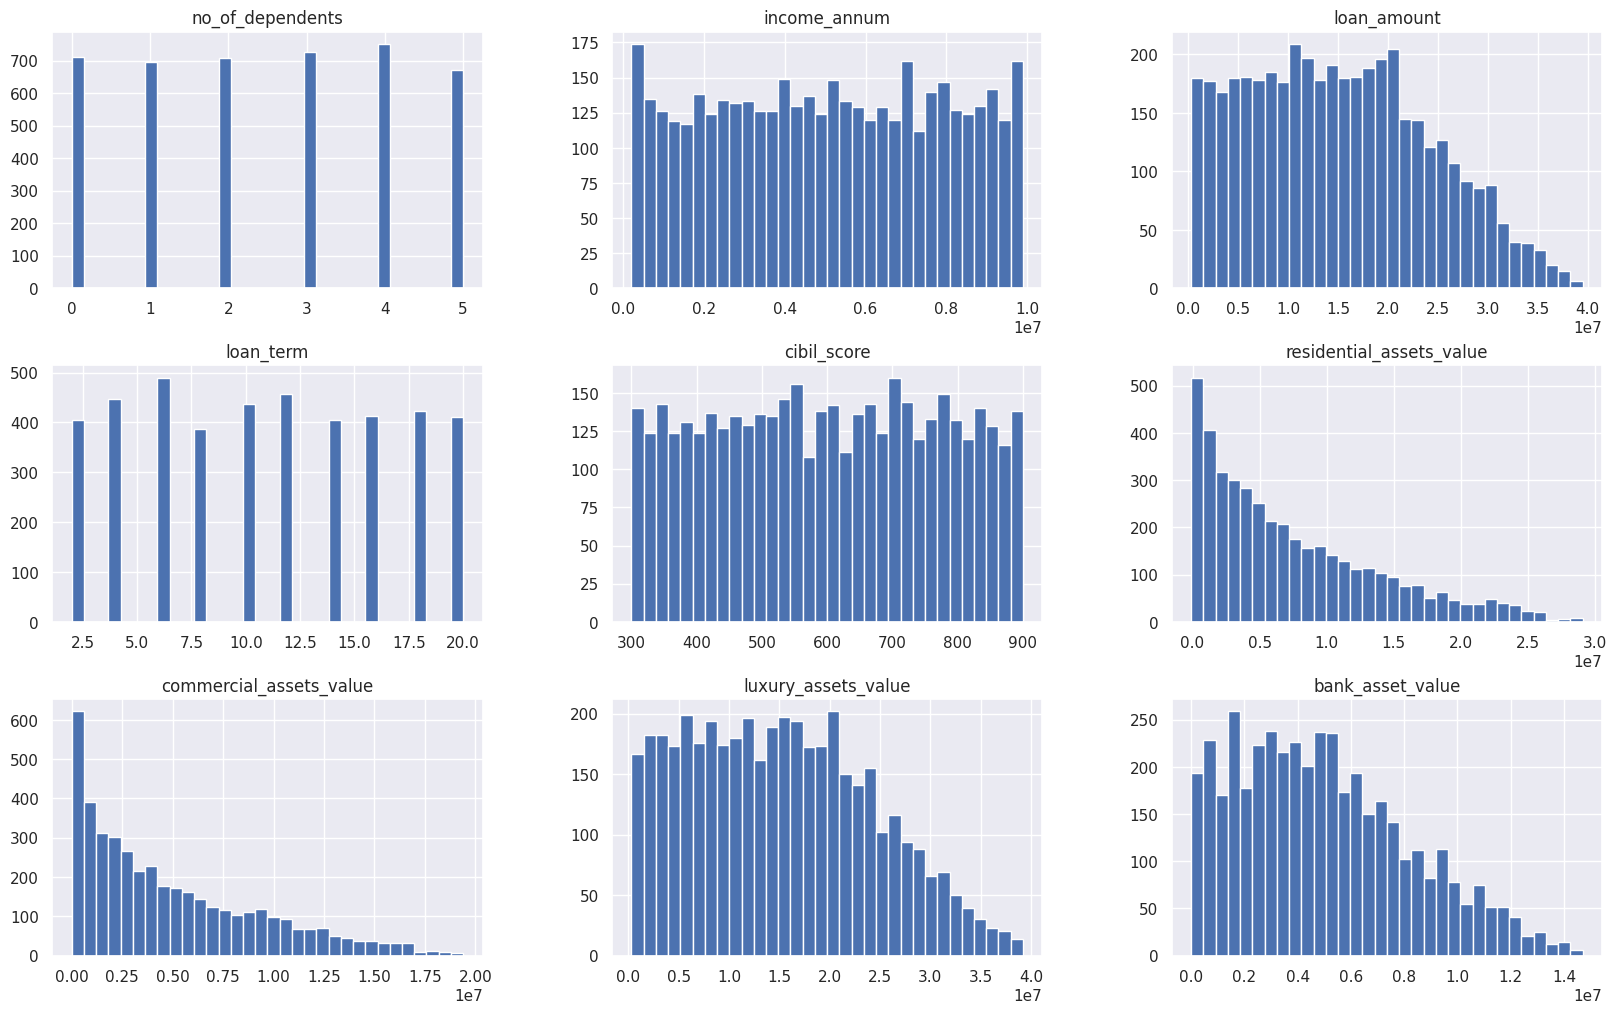

In [34]:
sns.set()
num_data.hist(figsize=(20,12),bins =32)
plt.show()

**Observation:** most of columns were pretty balance as uniform distribution appeared in many graphs. 'residential_assets_value' and 'commercial_assets_value' are exponential distribution. 'bank_asset_value', 'luxury_assets_value' and 'loan_amount' seemed like poisson distribution pdf. These columns might need some mathematical transformation if needed.

### Categorical data inspection

In [43]:
cat_data = raw_data.select_dtypes(include='object')

def missing_ratio(s):
    return (s.isna().mean() * 100).round(3)

def num_values(s):
    s = s.str.split(';')
    s = s.explode()
    return len(s.value_counts())

def value_ratios(s):
    s = s.str.split(';')
    s = s.explode()
    totalCount = (~s.isna()).sum()
    return ((s.value_counts()/totalCount*100).round(3)).to_dict()

cat_data_info = cat_data.agg([missing_ratio, num_values, value_ratios])
cat_data_info

,education,self_employed,loan_status
missing_ratio,0.0,0.0,0.0
num_values,2,2,2
value_ratios,"{' Graduate': 50.223, ' Not Graduate': 49.777}","{' Yes': 50.363, ' No': 49.637}","{' Approved': 62.216, ' Rejected': 37.784}"
